In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.inception_v3 import InceptionV3

In [ ]:
conv_base = InceptionV3(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
conv_base.trainable = False

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=5,validation_data=validation_ds)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.9857 - loss: 0.0376 - val_accuracy: 0.9632 - val_loss: 0.0904
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.9828 - loss: 0.0452 - val_accuracy: 0.9614 - val_loss: 0.1272
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.9882 - loss: 0.0331 - val_accuracy: 0.9658 - val_loss: 0.1036
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 42ms/step - accuracy: 0.9922 - loss: 0.0231 - val_accuracy: 0.9648 - val_loss: 0.1189
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.9925 - loss: 0.0201 - val_accuracy: 0.9638 - val_loss: 0.1189


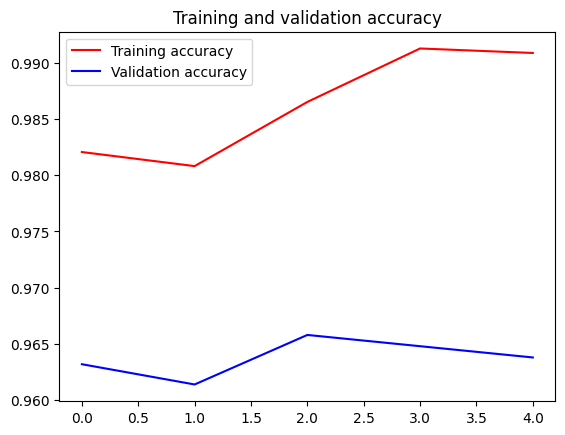

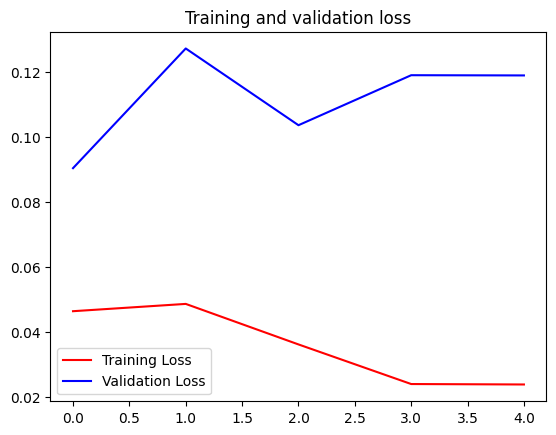

In [ ]:
# prompt: plot gph from 0

import matplotlib.pyplot as plt

# Assuming 'history' is the variable holding the training history
# from your previous code.  If not, replace with the correct variable.

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [ ]:

import numpy as np
from tensorflow import keras
from keras.preprocessing import image

# Load and preprocess the image
img_path = '/content/Screenshot 2025-04-03 000912.png'  # Replace with the actual path to your image
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0  # Normalize the image

# Make the prediction
prediction = model.predict(x)

# Interpret the prediction
if prediction[0][0] > 0.5:
    print("Predicted class: Dog")
else:
    print("Predicted class: Cat")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Predicted class: Cat
